<font color="yellow" size="6">Outliers</font>
<p><font color="GREEN" size="4">4.Elliptic Envelope</font>

The Elliptic Envelope method is an outlier detection technique that assumes the majority of the data points follow a Gaussian distribution (normal distribution) and tries to fit an ellipse to the data. Points that fall outside the fitted ellipse are considered outliers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features (Elliptic Envelope assumes the data is centered around 0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elliptic Envelope Model: The model fits an ellipse to the data assuming that the majority of the points belong to a Gaussian distribution. Points that lie outside the fitted ellipse are classified as outliers. The contamination parameter specifies the proportion of outliers in the data. We assume that 5% of the data points might be outliers.

In [3]:
# Initialize the Elliptic Envelope model
# The model automatically fits the covariance matrix using MCD (Minimum Covariance Determinant)
model = EllipticEnvelope(contamination=0.05)  # Expect 5% of the data to be outliers

In [4]:
# Fit the model on the data
model.fit(X_scaled)


EllipticEnvelope(contamination=0.05)

In [5]:
# Predict outliers (1 for inliers, -1 for outliers)
y_pred = model.predict(X_scaled)

In [6]:
# Outliers are marked as -1, inliers are marked as 1
outliers = y_pred == -1
print(f"Number of outliers detected: {np.sum(outliers)}")


Number of outliers detected: 8


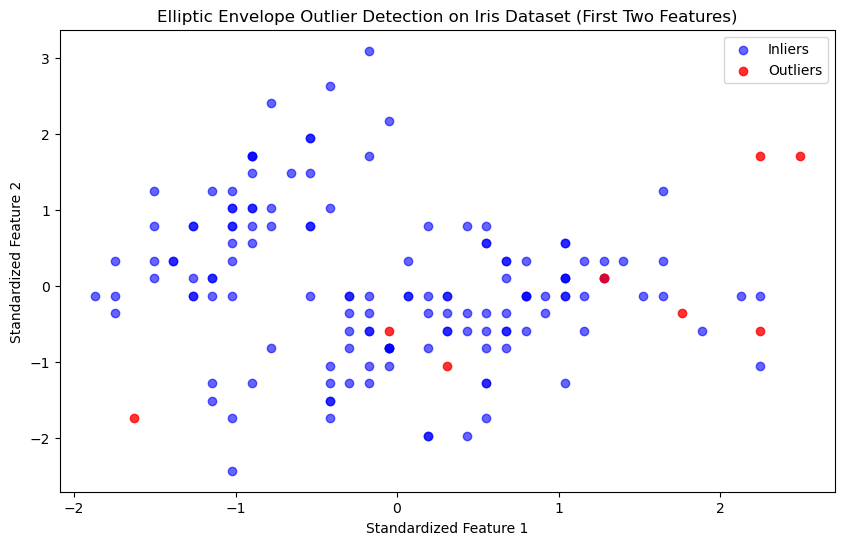

In [7]:
# Visualize the first two features to see how the outliers are detected
plt.figure(figsize=(10, 6))

# Plot inliers (points classified as 1)
plt.scatter(X_scaled[~outliers, 0], X_scaled[~outliers, 1], color='blue', label='Inliers', alpha=0.6)

# Plot outliers (points classified as -1)
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], color='red', label='Outliers', alpha=0.8)

plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.legend()
plt.title('Elliptic Envelope Outlier Detection on Iris Dataset (First Two Features)')
plt.show()